# TomoTools Demo
* TomoTools is a Hyperspy-based package designed for manipulating and reconstructing electron tomography data
* Depends on several external libraries beyond Hyperspy
    * OpenCV: spatial registration
    * TomoPy: reconstruction
    * Astra Toolbox: GPU-based reconstruction

### Installation
* Install external packages:
    * conda install -c conda-forge opencv
    * conda install -c astra-toolbox astra-toolbox
    * conda install -c conda-forge tomopy
    
    
* Install TomoTools via pip:
    * pip install git+https://gitlab.com/aaherzing/tomotools.git

In [66]:
%matplotlib notebook
import tomotools.api as tomotools
import matplotlib.pylab as plt

### Read data from HDF5 file
- Converts to TomoStack, a sub-class of HyperSpy's Signal2D
* In this case, the tilts angles have to be manually supplied

<IPython.core.display.Javascript object>


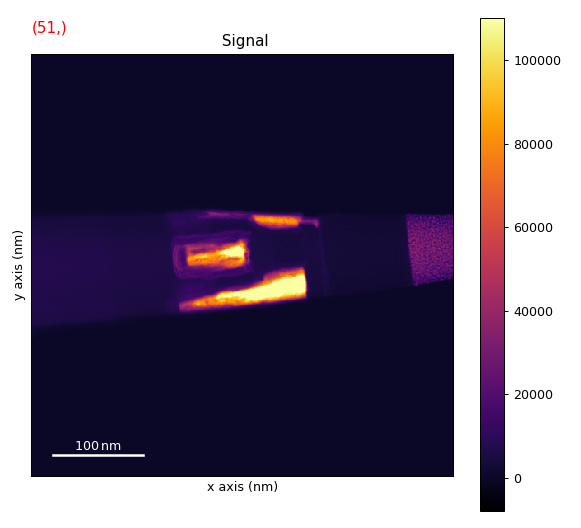

In [120]:
haadf = tomotools.load('examples/2_HAADF.hdf5')
haadf.plot(navigator='slider',cmap='inferno',vmin=-8000,vmax=110000)

### Spatially register the image stack 
- Using enhanced correlation coefficient algorithm as implemented in OpenCV

<IPython.core.display.Javascript object>


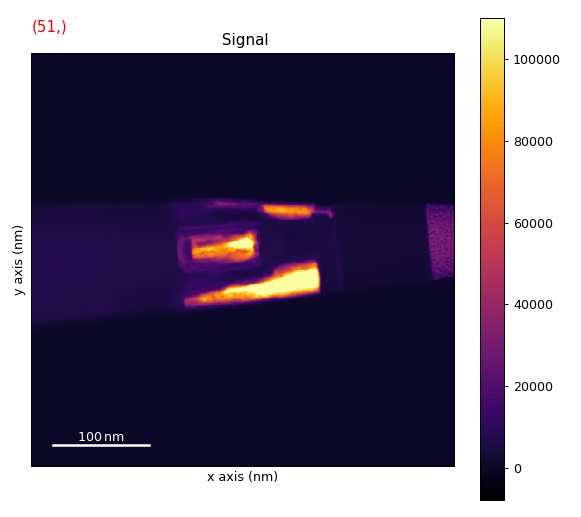

In [119]:
#reg = haadf.stack_register('ECC', crop=True, show_progressbar=True)
reg.plot(navigator='slider',cmap='inferno',vmin=-8000,vmax=110000)

### Align the tilt axis and lateral shift
- Minimizes reconstruction artifacts
- Based on tracking the center of mass (CoM) of the needle
- User must specify three locations in stack from which to perform the fitting
- It is best to choose locations that are in a single phase slice of the data

<IPython.core.display.Javascript object>


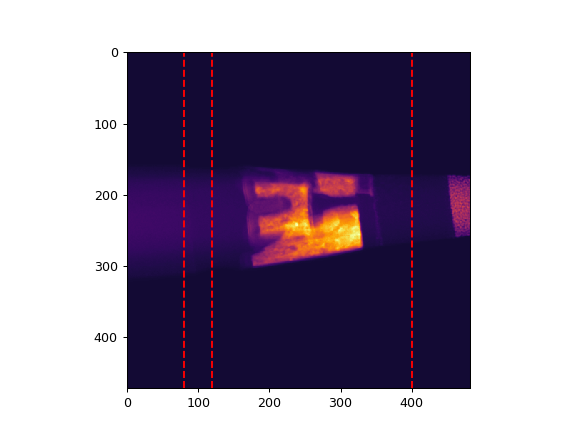

In [121]:
fig,ax = plt.subplots(1)
ax.imshow(reg.data[35,:,:], cmap='inferno', vmin=-8000,vmax=80000)
ax.axvline(80,color='red',linestyle='--')
ax.axvline(120,color='red',linestyle='--')
ax.axvline(400,color='red',linestyle='--')

<IPython.core.display.Javascript object>


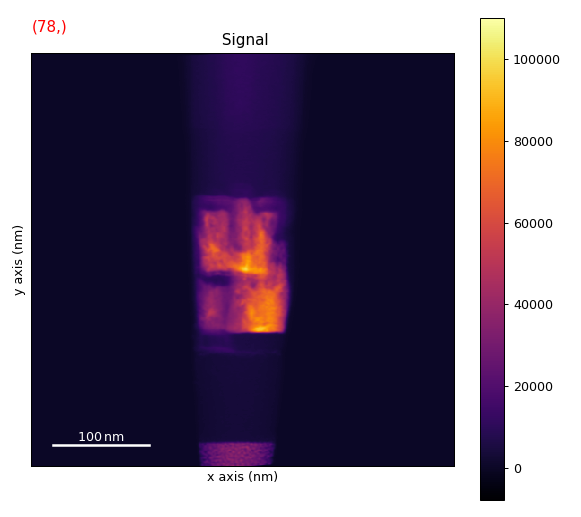

In [123]:
#ali = reg.tilt_align('CoM',locs=[80,120,400])
ali.plot(navigator='slider',cmap='inferno',vmin=-8000,vmax=110000)

## Reconstruct using weighted-backprojection
* Full dataset reconstructed
* Data can be vizualized in the X-Z orientation
* Visualization in other orientations can be achieved using the `swap_axes` Hyperspy method


In [56]:
recWBP = ali.reconstruct(method='FBP',thickness=300)

Reconstruction complete


<IPython.core.display.Javascript object>


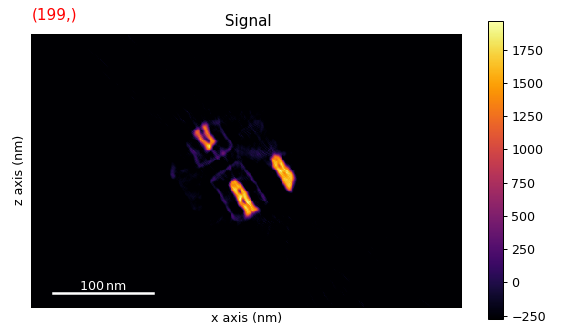

In [63]:
recWBP.plot(navigator='slider',cmap='inferno',vmin=100)

<IPython.core.display.Javascript object>


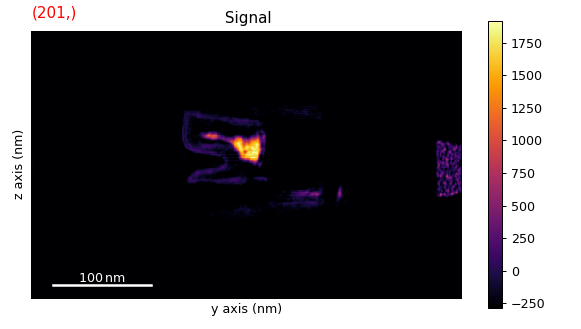

In [85]:
recWBP.swap_axes(0,1).plot(navigator='slider',cmap='inferno',vmin=100)

## Reconstruct the data using simulataneous iterative reconstruction technique (SIRT). 
- In this case, only ten slices from the middle of the stack are reconstructed to speed things up.
- 150 iterations
- Apply a positivity constraint

In [64]:
recSIRT150 = ali.isig[:,250:260].reconstruct(method='SIRT',thickness=300,iterations=150,constrain=True)

Reconstruction complete


<IPython.core.display.Javascript object>


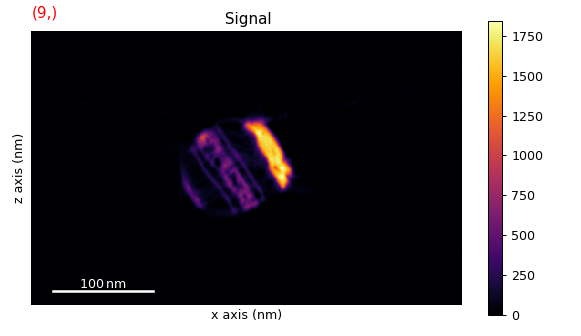

In [83]:
recSIRT150.plot(navigator='slider', cmap='inferno')

## Reconstruct the entire dataset SIRT
- 150 iterations
- Apply a positivity constraint

In [8]:
recSIRT150Full = ali.reconstruct(method='SIRT',thickness=300,iterations=150,constrain=True)

Reconstructing volume using CPU-based SIRT in the Astra Toolbox


100%|█████████████████████████████████████| 512/512 [13:30:01<00:00, 94.93s/it]


Reconstruction complete


## Save the aligned dataset and the reconstruction. 
- Data saved using HyperSpy's I/O functionality
- Compressed HDF5 format
- All metadata stored with data

In [12]:
ali.save('1_HAADF_Aligned.hdf5')
recWBP.save('1_HAADF_WBP.hdf5')
recSIRT150.save('1_HAADF_SIRT150_10Slices.hdf5')
recSIRT150Full.save('1_HAADF_SIRT150_Full.hdf5')

Overwrite '1_HAADF_SIRT50_10Slices.hdf5' (y/n)?
y
